In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/datasets/KBL_2000-01-01_2021-12-31.csv')

In [7]:
df.shape

(2450, 8)

In [8]:
# Step 1: Ensure 'Date' is in datetime format and sort the DataFrame by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Step 2: Create the "Opening Price" column by shifting the "Close Price" column
df['Opening Price'] = df['Close Price'].shift(1)

# Step 3: Set the "Opening Price" of the first row to its "Close Price"
df.loc[0, 'Opening Price'] = df.loc[0, 'Close Price']

# Display the modified DataFrame
print(df)

      S.N.       Date  Total Transactions  Total Traded Shares  \
0     2450 2010-04-15                   1                100.0   
1     2449 2010-04-15                   1                100.0   
2     2448 2010-04-15                   1                100.0   
3     2447 2010-04-26                  14               1102.0   
4     2446 2010-04-27                   2                200.0   
...    ...        ...                 ...                  ...   
2445     5 2021-12-23                 368              78964.0   
2446     4 2021-12-26                 412             111358.0   
2447     3 2021-12-27                 445             140132.0   
2448     2 2021-12-28                 205              42094.0   
2449     1 2021-12-29                 260              49102.0   

      Total Traded Amount  Max. Price  Min. Price  Close Price  Opening Price  
0                 41700.0       417.0       417.0        417.0          417.0  
1                 41700.0       417.0       417

In [9]:
df

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price,Opening Price
0,2450,2010-04-15,1,100.0,41700.0,417.0,417.0,417.0,417.0
1,2449,2010-04-15,1,100.0,41700.0,417.0,417.0,417.0,417.0
2,2448,2010-04-15,1,100.0,41700.0,417.0,417.0,417.0,417.0
3,2447,2010-04-26,14,1102.0,420797.0,409.0,376.0,376.0,417.0
4,2446,2010-04-27,2,200.0,73800.0,369.0,369.0,369.0,376.0
...,...,...,...,...,...,...,...,...,...
2445,5,2021-12-23,368,78964.0,19514036.8,252.8,242.6,248.4,247.9
2446,4,2021-12-26,412,111358.0,27772135.0,251.0,245.0,249.0,248.4
2447,3,2021-12-27,445,140132.0,34702741.7,253.9,243.0,244.0,249.0
2448,2,2021-12-28,205,42094.0,10111728.5,244.0,238.0,241.0,244.0


In [10]:
ma_100_days=df['Close Price'].rolling(100).mean()
ma_100_days

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2445,311.570
2446,310.190
2447,308.703
2448,307.015


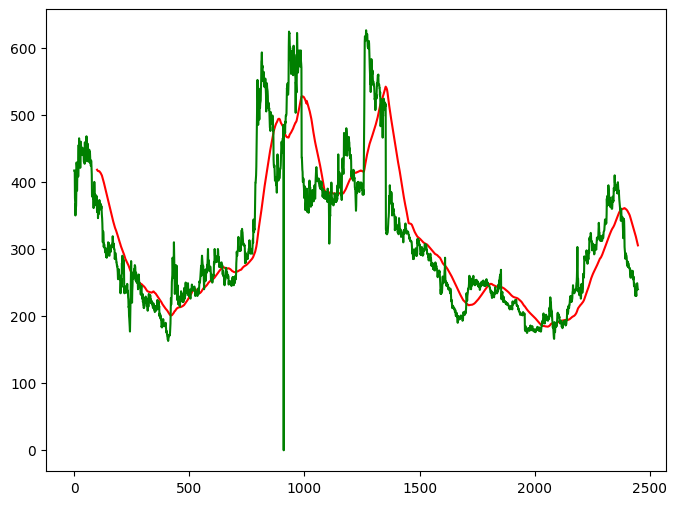

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(df['Close Price'],'g')
plt.show()

In [12]:
ma_200_days= df['Close Price'].rolling(200).mean()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

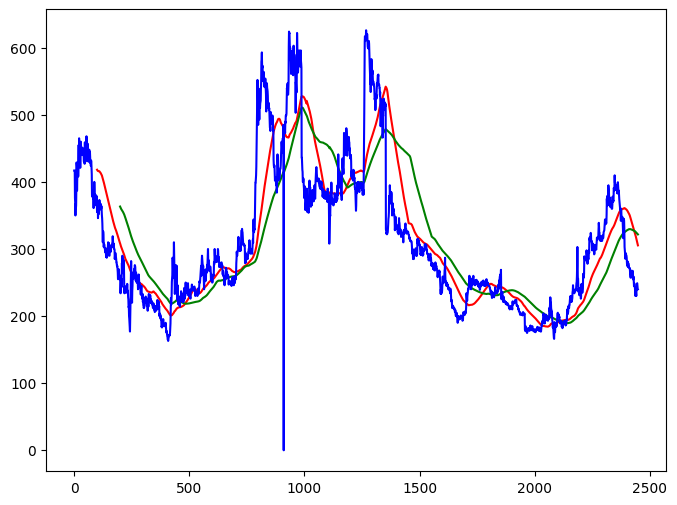

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'g')
plt.plot(df['Close Price'],'b')
plt

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(2450, 9)

In [16]:
data_train=pd.DataFrame(df['Close Price'][0:int(len(df)*0.80)])
data_test=pd.DataFrame(df['Close Price'][int(len(df)*0.80):int(len(df))])

In [17]:
data_test.shape

(490, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scaker= scaler.fit_transform(data_train)
data_train_scaker

array([[0.66613419],
       [0.66613419],
       [0.66613419],
       ...,
       [0.32428115],
       [0.28753994],
       [0.28434505]])

In [20]:
x=[]
y=[]
for i in range(100,data_train_scaker.shape[0]):
  x.append(data_train_scaker[i-100:i])
  y.append(data_train_scaker[i,0])

In [21]:
!pip install tensorflow==2.13.0

In [22]:
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
x,y = np.array(x),np.array(y)

In [31]:
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))  # Correct way to add Dropout

# Second LSTM layer with Dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with Dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Final LSTM layer with Dropout
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [34]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
59/59 [==============================] - 25s 302ms/step - loss: 0.0427
Epoch 2/50
59/59 [==============================] - 18s 300ms/step - loss: 0.0145
Epoch 3/50
59/59 [==============================] - 18s 306ms/step - loss: 0.0122
Epoch 4/50
59/59 [==============================] - 21s 348ms/step - loss: 0.0113
Epoch 5/50
59/59 [==============================] - 19s 330ms/step - loss: 0.0099
Epoch 6/50
59/59 [==============================] - 17s 295ms/step - loss: 0.0091
Epoch 7/50
59/59 [==============================] - 26s 436ms/step - loss: 0.0086
Epoch 8/50
59/59 [==============================] - 18s 312ms/step - loss: 0.0078
Epoch 9/50
59/59 [==============================] - 18s 299ms/step - loss: 0.0082
Epoch 10/50
59/59 [==============================] - 18s 311ms/step - loss: 0.0070
Epoch 11/50
59/59 [==============================] - 22s 373ms/step - loss: 0.0068
Epoch 12/50
59/59 [==============================] - 18s 311ms/step - loss: 0.0059
Epoch 13/50
5

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [36]:
past_100_days= data_train.tail(100)

In [37]:
data_test= pd.concat([past_100_days,data_test],ignore_index=True)

In [38]:
data_test

,Close Price
0,236.0
1,229.0
2,226.0
3,224.0
4,221.0
...,...
585,248.4
586,249.0
587,244.0
588,241.0


In [39]:
data_test_scale = scaler.fit_transform(data_test)

In [41]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
(x,y)= np.array(x),np.array(y)

In [42]:
y_predict= model.predict(x)

16/16 [==============================] - 2s 77ms/step


In [46]:
scale=1/scaler.scale_

In [48]:
y_predict=y_predict*scale


In [49]:
y=y*scale

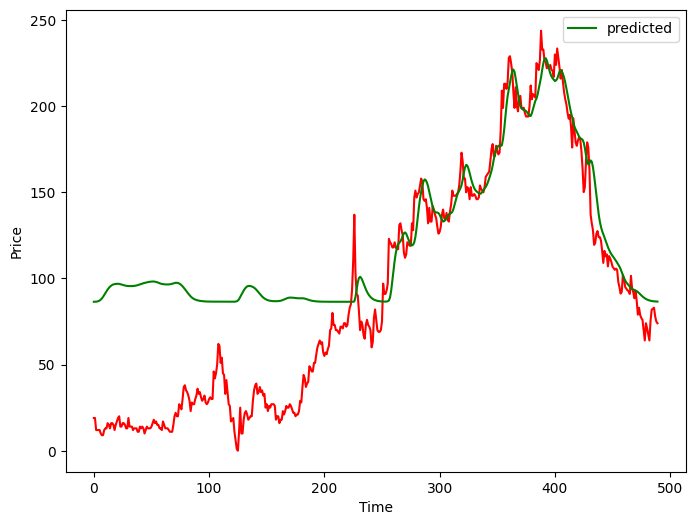

In [51]:
plt.figure(figsize=(8,6))
plt.plot(y,'r')
plt.plot(y_predict,'g',label='predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
model.save('KBL Prediction Model: Prediction')